<a href="https://colab.research.google.com/github/ayuti/Employee_Retention/blob/main/retention_emp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Business Scenario and Problem
<br>The HR department at Salifort Motors, a large ficticious consulting firm, has asked us to conduct an in-depth analysis of employee retention and to develop a predictive model that can help us predict whether employees will be retained or depart. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company and building a robust model would help in identifying factors that would improve retention. Therefore, the goal is to provide our stakeholders with a 1-page summary that outlines the findings of our analysis and the implications for the firm.


satisfaction_level=Employee-reported job satisfaction level [0–1]
last_evaluation=Score of employee's last performance review [0–1]
number_project=Number of projects employee contributes to
average_monthly_hours=Average number of hours employee worked per month
time_spend_company=How long the employee has been with the company (years)
Work_accident=Whether or not the employee experienced an accident while at work
left=Whether or not the employee left the company
promotion_last_5years=Whether or not the employee was promoted in the last 5 years
Department=The employee's department
salary=The employee's salary (U.S. dollars)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [ ]:
df=pd.read_csv('HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
emp_data = df.rename(columns = {'Work_accident': 'accident',
                          'average_montly_hours': 'hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department',
                          'number_project': 'num_project',
                          'promotion_last_5years': 'promotion',
                          'last_evaluation': 'eval'})
emp_data.head()


,satisfaction_level,eval,num_project,hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
emp_data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
sns.countplot(x='department',hue='left',data=emp_data)


In [ ]:
emp_data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
sns.countplot(x='salary',hue='left',data=emp_data)

<Axes: xlabel='count', ylabel='department'>

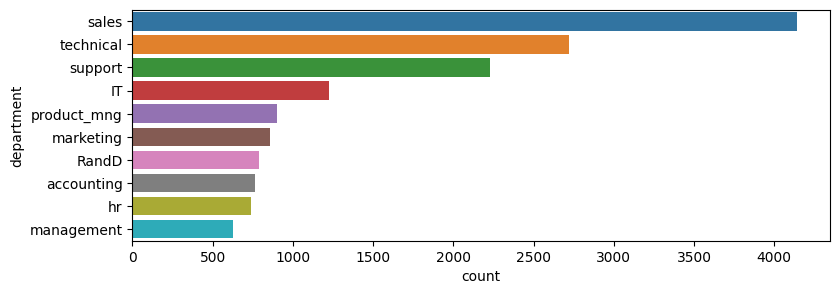

In [ ]:
plt.figure(figsize=(9,3))
sns.countplot(y='department', data=emp_data,order=emp_data['department'].value_counts().index)


In [ ]:
emp_data['left'].value_counts(normalize=True)*100


0    76.191746
1    23.808254
Name: left, dtype: float64

Approx 23.8% of employees have left and 76.2 are still employeed.

This means the dataset is not balanced



In [ ]:
emp_data.isna().sum()


satisfaction_level    0
eval                  0
num_project           0
hours                 0
tenure                0
accident              0
left                  0
promotion             0
department            0
salary                0
dtype: int64

In [ ]:
print('Amount of duplicates: {:,}'.format(emp_data.duplicated().sum()))
print('Percent of duplicates: {:.1%}'.format(emp_data.duplicated().mean()))


Amount of duplicates: 3,008
Percent of duplicates: 20.1%


In [ ]:
emp_data[emp_data.duplicated()]


,satisfaction_level,eval,num_project,hours,tenure,accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
emp_data1 = emp_data.drop_duplicates(keep = 'first').reset_index(drop = 'index')
emp_data1.head()


,satisfaction_level,eval,num_project,hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


It's very unlikely for duplicated rows to be different employees considering the number of features, therefore duplicates were dropped.

In [ ]:
emp_data['left'].value_counts(normalize=True)*100
